Shape: (1460, 80)
Missing values (top 10):
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageType        81
GarageFinish      81
dtype: int64


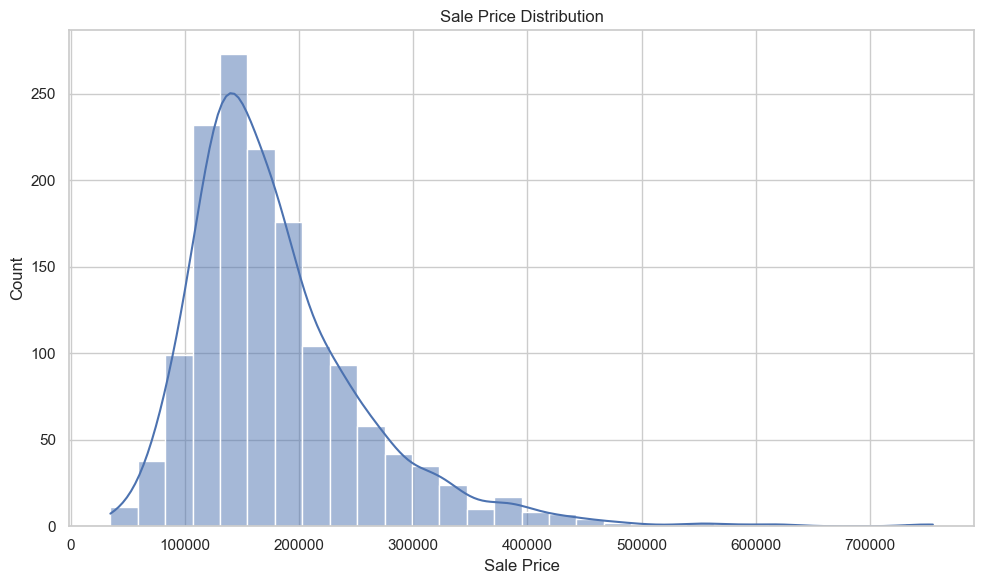

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


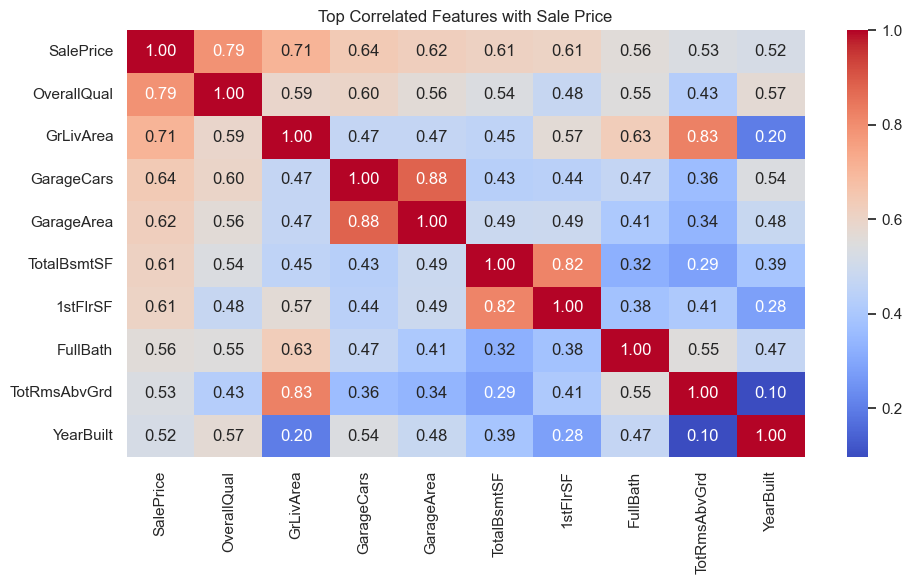

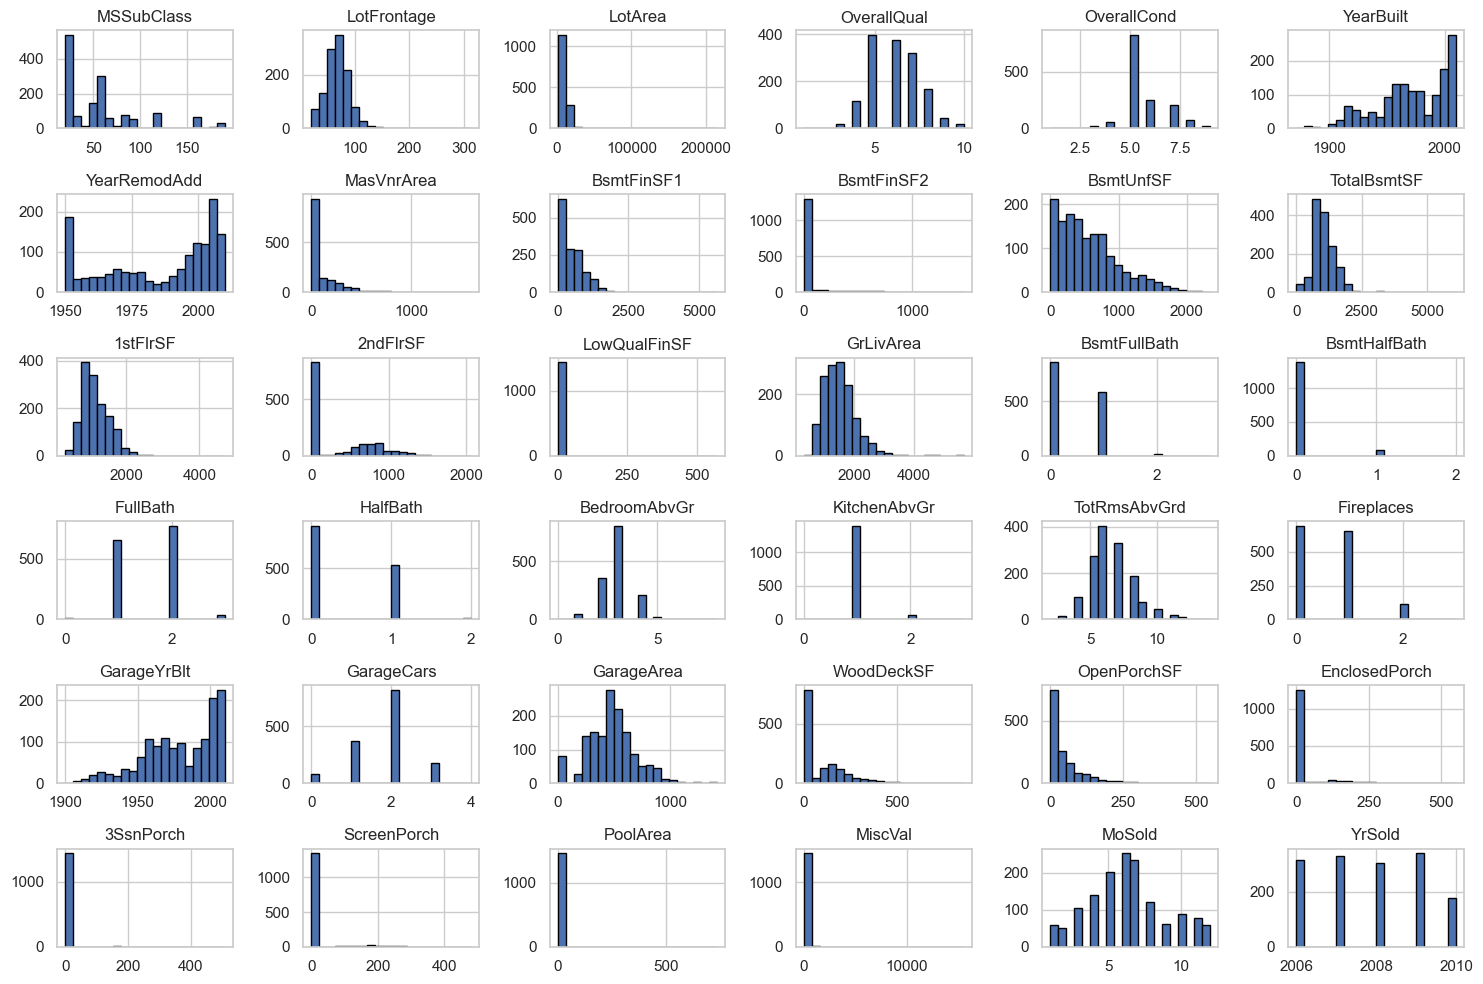

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Setup
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load dataset
df = pd.read_csv("../data/raw/train.csv")

# Drop ID column
df.drop(columns=["Id"], inplace=True)

# Quick info
print("Shape:", df.shape)
print("Missing values (top 10):\n", df.isnull().sum().sort_values(ascending=False).head(10))

# SalePrice distribution
sns.histplot(df["SalePrice"], bins=30, kde=True)
plt.title("Sale Price Distribution")
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../outputs/charts/saleprice_distribution.png")
plt.show()

# Skewness & kurtosis
print("Skewness:", df["SalePrice"].skew())
print("Kurtosis:", df["SalePrice"].kurt())

# Correlation heatmap (top 10)
numeric_df = df.select_dtypes(include=[np.number])
top_corr = numeric_df.corr()["SalePrice"].abs().sort_values(ascending=False).head(10).index
sns.heatmap(numeric_df[top_corr].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top Correlated Features with Sale Price")
plt.tight_layout()
plt.savefig("../outputs/charts/top_corr_heatmap.png")
plt.show()

# Numeric feature distributions (optional)
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("SalePrice")
df[num_cols].hist(figsize=(15, 10), bins=20, edgecolor="black")
plt.tight_layout()
plt.savefig("../outputs/charts/numeric_distributions.png")
plt.show()
